# <font color='#2B4865'>**Transformer's Attention Mechanism**</font>



This notebook is based on the reference notebooks from [Denis Rothman](https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/blob/main/Chapter02/Multi_Head_Attention_Sub_Layer.ipynb) and [Manuel Romero.](https://colab.research.google.com/drive/1rPk3ohrmVclqhH7uQ7qys4oznDdAhpzF)



In [4]:
%pip install --quiet colored

from colored import fore, back, style
import numpy as np
from scipy.special import softmax

## <font color='#2B4865'>**Step 1: Represent the input**
---
</font>

For visualization purposes, we are scaling down the input of the attention mechanism from $d_{model}=512$ as in the original Transformer model to $d_{model}=4$. This brings the dimensions of the vector of an input $x$ to the Transformer model down to $d_{model}=4$.

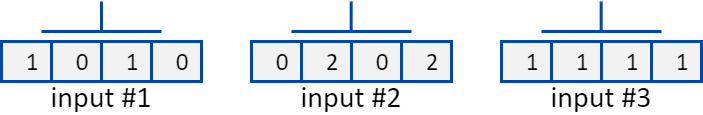

In [5]:
x =np.array([[1.0, 0.0, 1.0, 0.0],   # Input #1
             [0.0, 2.0, 0.0, 2.0],   # Input #2
             [1.0, 1.0, 1.0, 1.0]])  # Input #3
print(x)

[[1. 0. 1. 0.]
 [0. 2. 0. 2.]
 [1. 1. 1. 1.]]


## <font color='#2B4865'>**Step 2: Initialize weight matrices**
---
</font>

Every input must have three representations, namely <font color='#80D0FF'>queries</font>, <font color='#82D9B3'>keys</font> and <font color='#F89797'>values</font>. To obtain these representations, **each input has three weight matrices:**

*   <font color='#80D0FF'>$W^Q$</font> to train the <font color='#80D0FF'>queries</font>
*   <font color='#82D9B3'>$W^K$</font> to train the <font color='#82D9B3'>keys</font>
*   <font color='#F89797'>$W^V$</font> to train the <font color='#F89797'>values</font>

In the original Transformer model, these matrices are of $d_{k}=64$ dimensions, but here we will be scaling them down to $d_{k}=3$. Because every input has a dimension of $4$, this means each set of the weights must have a shape of $4\times 3$.

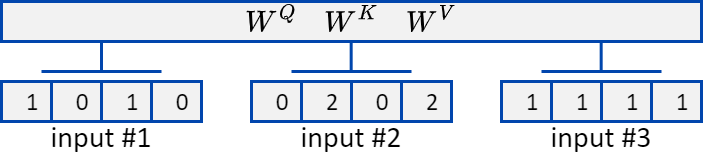

*Note: In a neural network setting, these weights are usually small numbers, initialized randomly using an appropriate random distribution like Gaussian, Xavier, and Kaiming distributions.*

In [7]:
w_query =np.array([[1, 0, 1],
                   [1, 0, 0],
                   [0, 0, 1],
                   [0, 1, 1]])

w_key =np.array([[0, 0, 1],
                 [1, 1, 0],
                 [0, 1, 0],
                 [1, 1, 0]])

w_value = np.array([[0, 2, 0],
                    [0, 3, 0],
                    [1, 0, 3],
                    [1, 1, 0]])

print( "Weights for query: \n", w_query)
print( "Weights for key: \n" , w_key)
print(f"Weights for value: \n" , w_value)

Weights for query: 
 [[1 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 1]]
Weights for key: 
 [[0 0 1]
 [1 1 0]
 [0 1 0]
 [1 1 0]]
Weights for value: 
 [[0 2 0]
 [0 3 0]
 [1 0 3]
 [1 1 0]]


## <font color='#2B4865'>**Step 3: Matrix multiplication to obtain queries, keys and values**
---
</font>

Now that we have the three sets of weights, we obtain the <font color='#80D0FF'>query</font>, <font color='#82D9B3'>key</font> and <font color='#F89797'>value</font> representations for every input. We do this by multiplying the input vectors by the weight matrices:

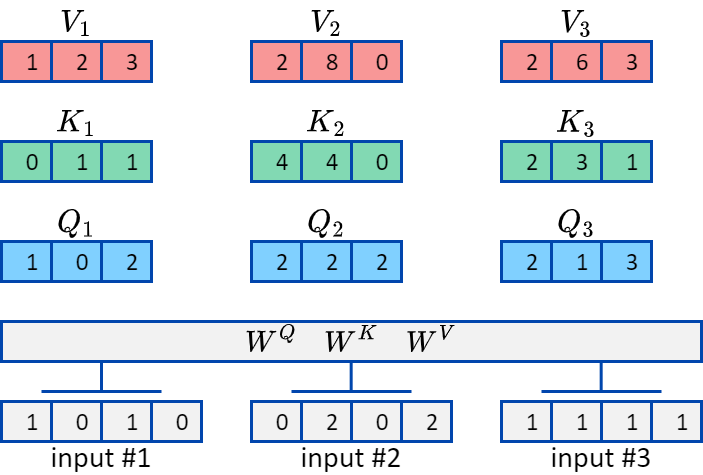

*Note: In practice, a bias vector may be added to the product of matrix multiplication*

In [8]:
Q=np.matmul(x,w_query)
K=np.matmul(x,w_key)
V=np.matmul(x,w_value)

print( "Queries: \n", Q)
print( "Keys: \n", K)
print( "Values: \n" , V)

Queries: 
 [[1. 0. 2.]
 [2. 2. 2.]
 [2. 1. 3.]]
Keys: 
 [[0. 1. 1.]
 [4. 4. 0.]
 [2. 3. 1.]]
Values: 
 [[1. 2. 3.]
 [2. 8. 0.]
 [2. 6. 3.]]


## <font color='#2B4865'>**Step 4: Calculate scaled attention scores**
---
</font>

The attention head now implements the original Transformer equation:

$$Attention(\mathbf{Q,K,V}) = softmax\left(\frac{\mathbf{QK^T}}{\sqrt{d_k}}\right)\mathbf{V}$$

This step focuses on $\mathbf{Q}$ and $\mathbf{K}$:

$$\left(\frac{\mathbf{QK^T}}{\sqrt{d_k}}\right)$$

We start by calculating the **scaled attention scores** for Input #1 by taking a scaled dot product between Input #1's <font color='#80D0FF'>query</font> with **all** <font color='#82D9B3'>keys</font>, including itself. Since there are 3 key representations (because we have 3 inputs), we obtain 3 attention scores for Input #1. Then, we repeat the same steps for both Input #2 and Input #3. In practice, we calculate the attention scores for all three inputs at once in matrix form.

*Note: For this example, we will round $\sqrt{d_k}=\sqrt{3}=1.75$ to $1$ to simplify the computations*

In [9]:
k_d=1
attention_scores = (Q @ K.transpose())/k_d
print( "Attention scores: \n", attention_scores)

Attention scores: 
 [[ 2.  4.  4.]
 [ 4. 16. 12.]
 [ 4. 12. 10.]]


Step 4 is now complete. For example, the score for $x_{1}$ is $[2,4,4]$ across the $\mathbf{K}$ across the head as displayed:

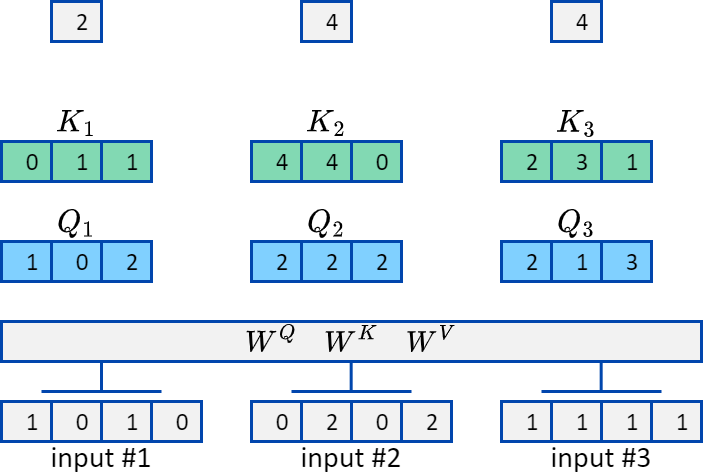

## <font color='#2B4865'>**Step 5: Scaled softmax attention scores**
---
</font>

We now apply a softmax function to each intermediate attention score. Instead of doing a matrix multiplication, let's zoom down to each vector:

In [10]:
attention_scores[0]=softmax(attention_scores[0])
attention_scores[1]=softmax(attention_scores[1])
attention_scores[2]=softmax(attention_scores[2])
print( "Scaled softmax attention scores: " )
print(attention_scores[0])
print(attention_scores[1])
print(attention_scores[2])

Scaled softmax attention scores: 
[0.06337894 0.46831053 0.46831053]
[6.03366485e-06 9.82007865e-01 1.79861014e-02]
[2.95387223e-04 8.80536902e-01 1.19167711e-01]


With this, we obtain a scaled softmax attention score for each vector. For example, the softmax of the score of $x_1$ for all the keys is $[0.06, 0.46, 0.46]$, as depicted below:

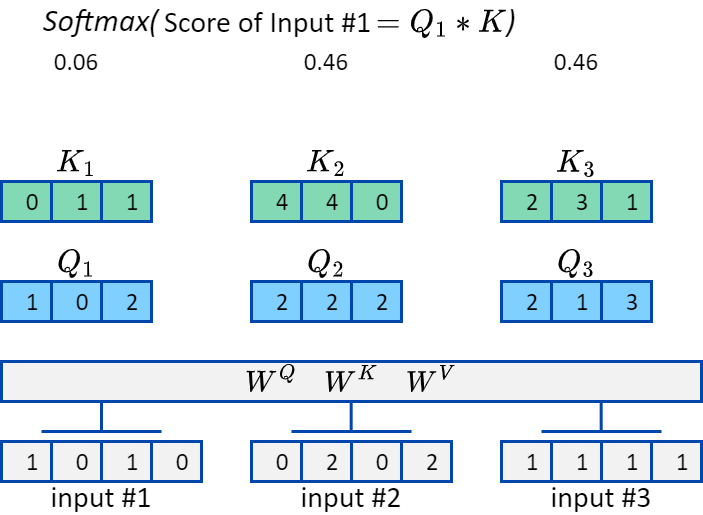

## <font color='#2B4865'>**Step 6: The final attention representations**
---
</font>

Based on the results obtained in Step 5, we can now finalize the complete attention equation presented in Step 4 by plugging V in:

$$Attention(\mathbf{Q,K,V}) = softmax\left(\frac{\mathbf{QK^T}}{\sqrt{d_k}}\right)\mathbf{V}$$

We will first calculate the attention score for input $x_1$ for *Steps 6 and 7*. Note that we calculate **one attention value per word vector**. When we reach *Step 8*, we will generalize the attention calculation to the other two input vectors.

To obtain $Attention(\mathbf{Q, K,V})$ for $x_1$, we multiply the intermediate attention score by the 3 value vectors one by one to zoom down into the inner workings of the equation:

In [12]:
print( "V1: \n" , V[0])
print("V2: \n" , V[1])
print( "V3: \n" , V[2])
print()

print( "Attention 1: " )
attention1=attention_scores[0].reshape(-1,1)
attention1=attention_scores[0][0]*V[0]
print(attention1)

print( "Attention 2: " )
attention2=attention_scores[0][1]*V[1]
print(attention2)

print( "Attention 3: " )
attention3=attention_scores[0][2]*V[2]
print(attention3)

V1: 
 [1. 2. 3.]
V2: 
 [2. 8. 0.]
V3: 
 [2. 6. 3.]

Attention 1: 
[0.06337894 0.12675788 0.19013681]
Attention 2: 
[0.93662106 3.74648425 0.        ]
Attention 3: 
[0.93662106 2.80986319 1.40493159]


*Step 6* is complete: The 3 attention values for $x_1$ for each input have been calculated:

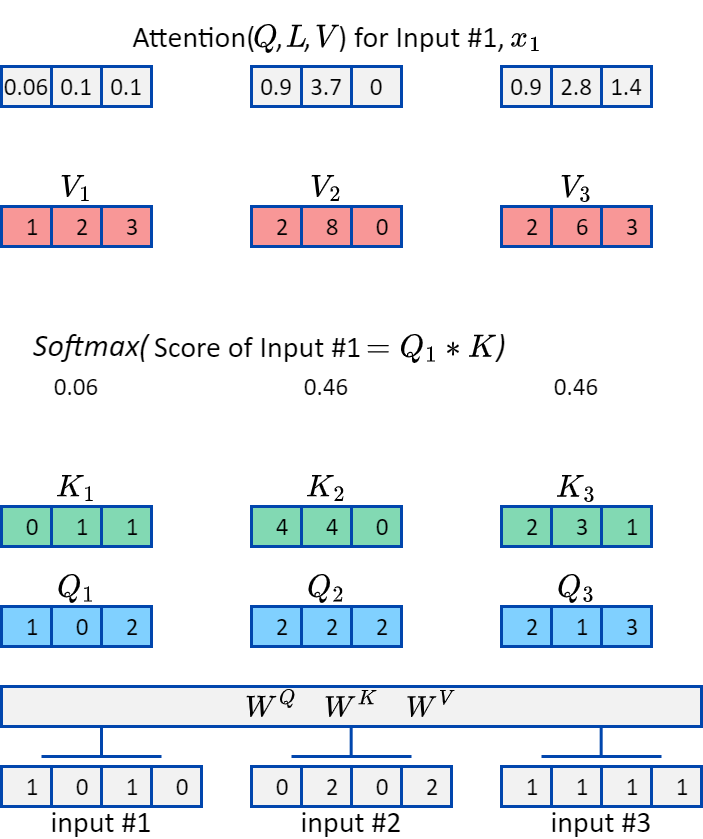

## <font color='#2B4865'>**Step 7: Summing up the results**
---
</font>

At this step, we sum up the results of *Step 6* to create the first line of the output matrix. The second line will be for the output of the next input, that is, $x_2$ for this example.

In [13]:
attention_input1=attention1+attention2+attention3
print("Sum Attention for x1: " , attention_input1)

Sum Attention for x1:  [1.93662106 6.68310531 1.59506841]


We can see the summed attention value for $x_1$ in the figure below, thus completing the steps for the first input.

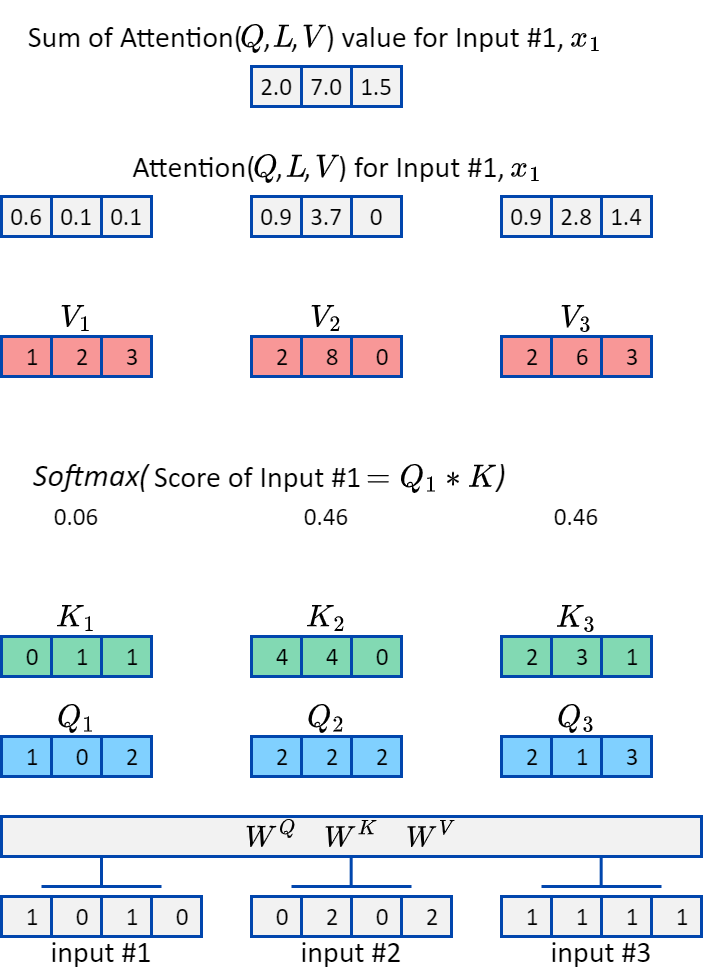

Now we need to add the results of all the input to the model.

## <font color='#2B4865'>**Step 8: Steps 1 to 7 for all the inputs**
---
</font>

The Transformer can now produce the attention values of inputs two and three using the same method described in *Steps 1 to 7* for one attention head.

From this step onwards, we will assume we have 3 attention values with learned weights with $d_{model}/8=64$. We now want to see what the original dimensions look like when they reach the sublayer's output.

We have seen the attention representation process in detail with a small model, so let's now assume we have already generated the 3 attention representations with a dimension of $d_{model}/8=64$:

In [14]:
# We assume we have 3 results with learned weights (they were not trained in this example)
# We assume we are implementing the original Transformer paper. We will have 3 results of 64 dimensions each
attention_head1=np.random.random((3, 64))
print(attention_head1)

[[9.64983067e-01 9.06064240e-01 8.22477508e-01 9.59765438e-01
  4.14801347e-01 7.77188232e-01 3.07011551e-01 4.88025765e-01
  7.50089739e-01 5.95156750e-01 1.91381937e-01 5.28709617e-01
  8.32126180e-01 5.01859369e-01 1.91334213e-01 4.58928385e-01
  5.65027883e-01 9.04196751e-01 7.16455534e-01 5.75512874e-01
  1.76368584e-01 9.51972818e-01 9.27418318e-01 2.33194982e-01
  7.17263538e-01 1.00323087e-01 8.96202611e-01 3.06934623e-01
  1.42572363e-01 7.94840810e-01 4.82457769e-01 1.50952678e-02
  7.72852101e-01 3.64987131e-01 2.37720103e-01 5.84655669e-01
  8.95442154e-01 1.50884798e-01 6.27764088e-01 6.23835711e-01
  5.13023226e-01 6.91489682e-01 1.15673302e-02 6.24622133e-01
  3.45622943e-01 7.55669037e-01 4.64971978e-01 7.53760557e-01
  8.79589694e-01 8.30883071e-01 3.18769282e-01 2.89242927e-02
  5.82618758e-01 8.61711718e-01 1.36722958e-01 7.19602556e-01
  1.48424002e-01 2.51230111e-01 9.78393493e-01 8.44411905e-01
  5.20580823e-01 2.94493123e-01 8.45011971e-01 7.97819804e-01]
 [1.785

The result above displayed simulates $z_0$, that is, the 3 output vectors of $d_{model}=64$ for head 1. With this, the Transformer now has the output vectors for the inputs of one head. The next step is to generate the output of the 8 heads to create the final output attention sublayer.

## <font color='#2B4865'>**Step 9: The output of the heads of the attention sublayer**
---
</font>

For this step, we assume that we have trained the 8 heads of the attention sublayer. The Transformer model now has 3 output vectors (of 3 input vectors that are words or word pieces) of $d_{model}=64$ dimensions each:

In [15]:
z0h1=np.random.random((3, 64))
z1h2=np.random.random((3, 64))
z2h3=np.random.random((3, 64))
z3h4=np.random.random((3, 64))
z4h5=np.random.random((3, 64))
z5h6=np.random.random((3, 64))
z6h7=np.random.random((3, 64))
z7h8=np.random.random((3, 64))
print("Shape of each head: ", z0h1.shape, "\nDimension of 8 heads: ",64*8)

Shape of each head:  (3, 64) 
Dimension of 8 heads:  512


The 8 heads have now produced $Z$:

$$Z = (Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7)$$

The Transformer will now concatenate the 8 elements of $Z$ for the final output of the Multi-Head attention sublayer.

## <font color='#2B4865'>**Step 10: Concatenation of the output of the heads**
---
</font>

The Transformer concatenates the 8 elements of $Z$:

$$MultiHead(Output)= Concat(Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7)W^0 = z, d_{model}$$

Note that $Z$ is multiplied by $W^0$, which is a weight matrix that is trained as well. In this model, we will assume $W^0$ is trained and integrated into the concatenation function.

In [16]:
output_attention=np.hstack((z0h1,z1h2,z2h3,z3h4,z4h5,z5h6,z6h7,z7h8))
print( "MultiHead Attention Output :\n ", output_attention)

MultiHead Attention Output :
  [[0.01146731 0.28216684 0.92888244 ... 0.43170337 0.037831   0.64090616]
 [0.60559808 0.21342865 0.18573223 ... 0.98222915 0.02319718 0.16244173]
 [0.8747669  0.13214292 0.3395494  ... 0.86261903 0.21760823 0.82977007]]


The concatenation can be visualized as stacking the elements of $Z$ side by side:

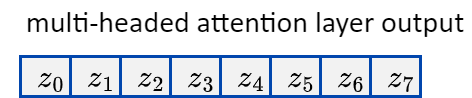

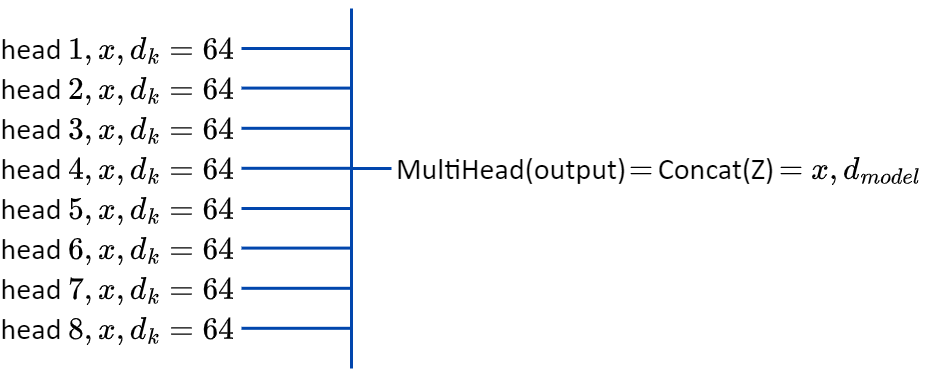